In [66]:
import pandas as pd


In [67]:
import numpy as np

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
from sklearn.model_selection import train_test_split 

In [72]:
import seaborn as sns

In [73]:
df_test=pd.read_csv("C:\\Kaggle comp\\titanic\\test.csv")

In [74]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [75]:
df=pd.read_csv("C:\\Kaggle comp\\titanic\\train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\AMAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\AMAN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


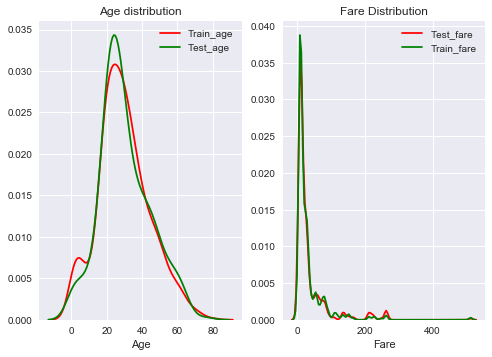

<Figure size 720x864 with 0 Axes>

In [76]:
fig,ax=plt.subplots(nrows=1,ncols=2)
sns.distplot(df['Age'],label='Train_age',color='red',hist=False,ax=ax[0])
sns.distplot(df_test['Age'],label='Test_age',color='green',hist=False,ax=ax[0])
ax[0].set_title('Age distribution')
sns.distplot(df_test['Fare'],label='Test_fare',color='red',hist=False,ax=ax[1])
sns.distplot(df['Fare'],label='Train_fare',color='green',hist=False,ax=ax[1])
ax[1].set_title('Fare Distribution')
fig=plt.figure(figsize=(10,12))
plt.tight_layout()
plt.show()

In [77]:
print("Train Data\n",df.isna().sum().sort_values(ascending=False),"\n\nTest Data\n",df_test.isna().sum().sort_values(ascending=False))

Train Data
 Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64 

Test Data
 Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


# Missing Data

### Age

In [78]:
age_group=df.groupby(['Pclass','Parch']).mean()

In [79]:
age_group_test=df_test.groupby(['Pclass','Parch']).mean()

In [80]:
age=df[df['Age'].isna()]

In [81]:

for k in df[df['Age'].isna()].index:
    for i in range(1,4):
        if df.loc[k,'Pclass']==i:
            for j in range(7):
                if df.loc[k,'Parch']==j:
                    df.loc[k,'Age']=age_group.loc[(i,j),'Age']
                    
                
        

In [82]:
for k in df_test[df_test['Age'].isna()].index:
    for i in range(1,4):
        if df_test.loc[k,'Pclass']==i:
            for j in [0,1,2,3,4,5,6,9]:
                if df_test.loc[k,'Parch']==j:
                    df_test.loc[k,'Age']=age_group_test.loc[(i,j),'Age']

In [83]:
df_test.loc[df_test[(df_test['Age'].isna()) & (df_test['Parch']==9)].index,'Age']=69.55

In [84]:
df_test.loc[df_test[(df_test['Age'].isna()) & (df_test['Parch']==4)].index,'Age']=25.46

### Cabin

In [85]:
#as far as i can see cabin depends on fare and fare depends eavily on Pclass and embarked column
ep_grp_df=df.groupby(['Embarked','Pclass']).mean()
ep_grp_df

PassengerId  Survived        Age     SibSp     Parch  \
Embarked Pclass                                                         
C        1        440.800000  0.694118  38.270281  0.376471  0.317647   
         2        444.352941  0.529412  23.980153  0.588235  0.529412   
         3        451.484848  0.378788  22.407023  0.348485  0.378788   
Q        1        329.500000  0.500000  38.500000  1.500000  0.000000   
         2        418.000000  0.666667  40.027100  0.000000  0.000000   
         3        420.347222  0.375000  26.988318  0.416667  0.180556   
S        1        477.842520  0.582677  38.425256  0.433071  0.393701   
         2        446.634146  0.463415  30.518173  0.390244  0.371951   
         3        440.685552  0.189802  25.546649  0.705382  0.439093   

                       Fare  
Embarked Pclass              
C        1       104.718529  
         2        25.358335  
         3        11.214083  
Q        1        90.000000  
         2        12.350000  
         3        11.183393  
S        1        70.364862  
         2        20.327439  
         3        14.644083

In [86]:
cabin_grp=df.groupby(['Cabin']).mean()
cabin_grp

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584.0,0.0,1.0,36.000000,0.0,0.00,40.125000
A14,476.0,0.0,1.0,39.906716,0.0,0.00,52.000000
A16,557.0,1.0,1.0,48.000000,1.0,0.00,39.600000
A19,285.0,0.0,1.0,39.906716,0.0,0.00,26.000000
A20,600.0,1.0,1.0,49.000000,1.0,0.00,56.929200
...,...,...,...,...,...,...,...
F33,310.0,1.0,2.0,29.000000,0.0,0.00,11.333333
F38,777.0,0.0,3.0,27.835227,0.0,0.00,7.750000
F4,401.5,1.0,2.0,2.500000,2.0,1.00,39.000000


In [87]:
df['Cabin'].str.extract('(\D)')

,0
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [88]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [89]:
df['Cabin']=df['Fare'].apply(lambda x:cabin_estimator(x))
df_test['Cabin']=df_test['Fare'].apply(lambda x:cabin_estimator(x))

### Fare in test set

In [90]:
ep_grp_df=df_test.groupby(['Embarked','Pclass']).mean()
ep_grp_df

PassengerId        Age     SibSp     Parch        Fare
Embarked Pclass                                                        
C        1       1095.196429  40.487755  0.428571  0.446429  110.073511
         2       1114.363636  26.055631  0.363636  0.272727   20.120445
         3       1087.657143  23.968222  0.428571  0.314286   10.658700
Q        1       1303.000000  37.000000  1.000000  0.000000   90.000000
         2        965.750000  47.076493  0.000000  0.000000   11.273950
         3       1094.951220  25.821064  0.195122  0.024390    8.998985
S        1       1097.520000  41.432000  0.520000  0.320000   76.677504
         2       1126.243590  28.320922  0.397436  0.371795   23.056090
         3       1095.563380  24.974487  0.549296  0.556338   13.913030

In [91]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [92]:
#embarked at S and Pclass is 3
df_test['Fare'].fillna(13.91,inplace=True)

### EDA of categorical varibales through contingency tables for testing dataset

In [93]:
pd.crosstab(df['Sex'],df['Survived'],normalize=False)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [97]:
pd.crosstab(df['Binned_Age'],df['Survived'],normalize='index')

Survived,0,1
Binned_Age,,
0,0.142857,0.857143
1,0.423077,0.576923
2,0.627907,0.372093
3,0.586667,0.413333
4,0.648148,0.351852
5,0.589372,0.410628
6,0.656250,0.343750
7,0.875000,0.125000


In [98]:
df_test['Binned_Age'].value_counts()

4    246
5     95
3     26
2     19
6     17
0      8
7      4
1      3
Name: Binned_Age, dtype: int64

In [99]:
pd.crosstab(df['Embarked'],df['Survived'],normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


In [100]:
pd.crosstab(df['Binned_Fare'],df['Survived'],normalize='index')

Survived,0,1
Binned_Fare,,
0,0.933333,0.066667
1,0.774336,0.225664
2,0.714286,0.285714
3,0.537445,0.462555
4,0.450980,0.549020
5,0.264151,0.735849


In [101]:
df_test['Binned_Fare'].value_counts()

1    116
3    104
2     97
4     67
5     31
0      3
Name: Binned_Fare, dtype: int64

In [102]:
pd.crosstab(df['Cabin'],df['Survived'],normalize='index')

Survived,0,1
Cabin,,
A,0.720000,0.280000
B,0.238095,0.761905
C,0.333333,0.666667
D,0.400000,0.600000
E,0.473684,0.526316
F,0.514493,0.485507
G,0.737603,0.262397
T,0.620253,0.379747


In [103]:
df_test['Cabin'].value_counts()

G    230
F     63
C     44
T     30
B     30
A     12
E      8
D      1
Name: Cabin, dtype: int64

In [104]:
pd.crosstab(df_test['Cabin'],df_test['Binned_Fare'])

Binned_Fare,0,1,2,3,4,5
Cabin,,,,,,
A,0,0,0,0,12,0
B,0,0,1,0,0,29
C,0,0,0,0,42,2
D,0,0,0,0,1,0
E,0,0,0,0,8,0
F,0,0,0,63,0,0
G,3,116,96,15,0,0
T,0,0,0,26,4,0


In [105]:
pd.crosstab(df['Pclass'],df['Survived'],normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [106]:
pd.crosstab(df['SibSp'],df['Survived'],normalize='index')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


In [107]:
df_test['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [108]:
pd.crosstab(df['Parch'],df['Survived'],normalize='index')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


In [109]:
'SibSp_1','SibSp_2','Pclass_2'

('SibSp_1', 'SibSp_2', 'Pclass_2')

In [110]:
print("train_data\n",df['Parch'].value_counts(),"\ntest_data\n",df_test['Parch'].value_counts())

train_data
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 
test_data
 0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


In [111]:
print("train_data\n",df['SibSp'].value_counts(),"\ntest_data\n",df_test['SibSp'].value_counts())

train_data
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 
test_data
 0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


In [112]:
#looks like there are some outliers remove those fuckers from training data
df.drop(df[(df['Parch']==6) | (df['Parch']==5) | (df['Parch']==4) | (df['SibSp']==8) | (df['SibSp']==5)].index,inplace=True)

In [113]:
#shits have been dropped from training set as no of samples has been decreased
df.shape

(869, 14)

## Feature Engineering


#### Binning of Age and Fare

In [95]:
#binning of Age
age_bins=[0,1,4,13,18,35,55,65,81]
age_labels=[0,1,2,3,4,5,6,7]
df['Binned_Age']=pd.cut(df['Age'],bins=age_bins,labels=age_labels)
df_test['Binned_Age']=pd.cut(df_test['Age'],bins=age_bins,labels=age_labels)

In [96]:
#binning of fare
fare_bins=[-1,4,8,15,33,100,513]
fare_labels=[0,1,2,3,4,5]
df['Binned_Fare']=pd.cut(df['Fare'],bins=fare_bins,labels=fare_labels)
df_test['Binned_Fare']=pd.cut(df_test['Fare'],bins=fare_bins,labels=fare_labels)

In [114]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,446.420023,0.392405,2.293441,29.606298,0.434983,0.309551,31.557048
std,256.568668,0.488567,0.838429,13.269159,0.818547,0.636569,49.570513
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,3.000000,27.835227,0.000000,0.000000,13.858300
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,4.000000,3.000000,512.329200


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    869 non-null int64
Survived       869 non-null int64
Pclass         869 non-null int64
Name           869 non-null object
Sex            869 non-null object
Age            869 non-null float64
SibSp          869 non-null int64
Parch          869 non-null int64
Ticket         869 non-null object
Fare           869 non-null float64
Cabin          869 non-null object
Embarked       867 non-null object
Binned_Age     869 non-null category
Binned_Fare    869 non-null category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [116]:
pd.crosstab(df['Binned_Age'],df['Survived'],normalize='index')

Survived,0,1
Binned_Age,,
0,0.076923,0.923077
1,0.423077,0.576923
2,0.529412,0.470588
3,0.575342,0.424658
4,0.647423,0.352577
5,0.577889,0.422111
6,0.645161,0.354839
7,0.875000,0.125000


In [117]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Binned_Age     category
Binned_Fare    category
dtype: object

In [118]:
#replace missing vales of Embarked with C
df['Embarked'].fillna('C',inplace=True)

In [119]:
from sklearn.preprocessing import LabelEncoder
#labelling Embarked column
le_eb=LabelEncoder()
le_eb.fit(["S","C","Q"])
df['Embarked']=le_eb.transform(df['Embarked'])
#test set
le_eb=LabelEncoder()
le_eb.fit(["S","C","Q"])
df_test['Embarked']=le_eb.transform(df_test['Embarked'])

In [126]:
le=LabelEncoder()
le.fit(["male","female"])
df_test["Sex"]=le.transform(df_test["Sex"])
le.fit(['A','B','C','D','E','F','G','T'])
df["Cabin"]=le.transform(df["Cabin"])
df_test["Cabin"]=le.transform(df_test["Cabin"])

### One hot encoding

In [127]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binned_Age,Binned_Fare
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,6,1,4,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,6,2,5,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,6,1,6,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,6,2,4,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,6,2,4,2


In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Binned_Age,Binned_Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,6,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,5,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,6,2,4,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,2,4,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,6,2,4,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    869 non-null int64
Survived       869 non-null int64
Pclass         869 non-null int64
Name           869 non-null object
Sex            869 non-null object
Age            869 non-null float64
SibSp          869 non-null int64
Parch          869 non-null int64
Ticket         869 non-null object
Fare           869 non-null float64
Cabin          869 non-null object
Embarked       869 non-null int32
Binned_Age     869 non-null category
Binned_Fare    869 non-null category
dtypes: category(2), float64(2), int32(1), int64(5), object(4)
memory usage: 87.1+ KB


In [140]:
Features=["Pclass","Parch","SibSp","Binned_Age","Binned_Fare","Sex","Cabin","Embarked"]

In [169]:
#converting to numpy
X_train=df[Features].to_numpy()
X_test=df_test[Features].to_numpy()

In [142]:
#checking whether the no of features of training and testing data set is same or not
print(X_train.shape,X_test.shape)

(869, 8) (418, 8)


In [143]:
y=df['Survived'].to_numpy()

In [144]:
y.shape

(869,)

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
X_test=StandardScaler().fit(X_test).transform(X_test)

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y,test_size=0.3)

## Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4)

In [166]:
dt_model.fit(X_train,y_train)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [167]:
yhat=dt_model.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

#### Evaluation Decision Tree

In [160]:
from sklearn.metrics import accuracy_score

In [168]:
accuracy_score(yhat,y_test)

0.7969348659003831

In [136]:
from sklearn.model_selection import cross_val_score

In [170]:
score_dt_model=cross_val_score(dt_model,X_train,y,cv=5)

In [171]:
score_dt_model

array([0.8       , 0.77586207, 0.83908046, 0.83815029, 0.84393064])

In [172]:
score_dt_model.mean()

0.8194046907182246

In [ ]:
dt_model.fit(X,y)

In [ ]:
survived=dt_model.predict(X_test)

In [ ]:
len(survived)

In [ ]:
final_pred=pd.read_csv("C:\\Kaggle comp\\titanic\\test.csv",usecols=['PassengerId'])
final_pred.head()

In [ ]:
len(final_pred)

In [ ]:
final_pred['Survived']=survived
final_pred.head()

In [ ]:
final_pred.info()

In [ ]:
final_pred.to_csv("C:\\Kaggle comp\\titanic\\prediction.csv",index=False)

# Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc=RandomForestClassifier(n_estimators=12,n_jobs=2,criterion='entropy',min_samples_split=4,random_state=0)

In [153]:
score_rfc=cross_val_score(rfc,X_train,y,cv=5)
score_rfc.mean()

0.8217297379386277

In [154]:
predicted_prob=pd.DataFrame(rfc.predict_proba(X_test))

In [155]:
predicted_prob.to_csv("C:\\Kaggle comp\\titanic\\Survival_Probabilty1.csv")

In [154]:
rfc.fit(X_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [155]:
Survived=rfc.predict(X_test)

In [156]:
final_pred=pd.read_csv("C:\\Kaggle comp\\titanic\\test.csv",usecols=['PassengerId'])
final_pred['Survived']=Survived
final_pred.to_csv("C:\\Kaggle comp\\titanic\\prediction_RandomForest_without_one_hot.csv",index=False)

In [266]:
y_real=pd.read_csv("C:\\Users\\AMAN\Downloads\\prediction.csv",usecols=['Survived'])
y_real=y_real['Survived'].to_numpy()

In [255]:
yhat=rfc.predict(X_train)

In [147]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_train,Survived)

0.8618421052631579

In [156]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [157]:
X_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)